<a href="https://colab.research.google.com/github/joelvinas/COMP-SCI_5530/blob/main/COMP_SCI_5530_Assignment_1_Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Question #2
#Stage 1: Ingestion
#       ToDo: Determine how to manage source data file through both CoLab vs GitHub Repo
q2df_raw=pd.read_csv('sample_data/StudentsPerformance.csv')

#Stage 2: Pre-Processing

#The columns of [race/ethnicity] & [parental level of education] are not used and should be discarded
q2df = q2df_raw.drop(['race/ethnicity', 'parental level of education'], axis=1)

#Delete rows with any missing values
q2df = q2df.dropna()

#Clean up field names to remove non-breaking spaces & leading/trailing spaces
for curCol in q2df.columns:
  q2df.rename(columns={curCol: curCol.replace(chr(160),chr(32)).strip()}, inplace=True)

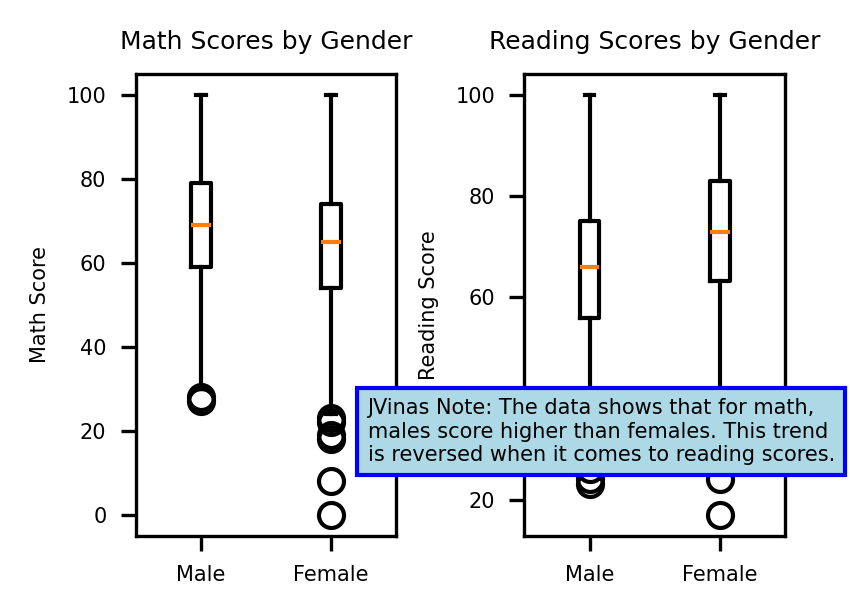

In [48]:

#------------------------------------------------------------------
#A: Visualization #1 - Gender boxplots (math vs reading) (2 pts)
#Aa.	Question: Are there gender differences in math vs reading?
#Ab.	Chart: Side‑by‑side boxplots of math score and reading score grouped by gender

#First, separate the data into male/female data frames
pop_male = q2df[q2df['gender'] =='male']
pop_female = q2df[q2df['gender'] =='female']

#Box plot is obtained by using the first quartile (Q1) to the third quartile (Q3) of the data, with a line at the median
#   Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

#Organize data for the math score
math_scores_male = pop_male['math score']
math_scores_female = pop_female['math score']
mathdata_multiple = [math_scores_male, math_scores_female]

#Organize data for the reading score
read_scores_male = pop_male['reading score']
read_scores_female = pop_female['reading score']
readdata_multiple = [read_scores_male, read_scores_female]

#Create a figure with two subplots (1 row, 2 columns)
dpi = 300
width = 800/dpi
height = 600/dpi
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(width,height), dpi=300)

#Plot the Math box plot on ax1
ax1.boxplot(mathdata_multiple)
ax1.set_title('Math Scores by Gender')
ax1.set_ylabel('Math Score')
ax1.set_xticklabels(['Male', 'Female'])

#Plot the Reading box plot on ax2
ax2.boxplot(readdata_multiple)
ax2.set_title('Reading Scores by Gender')
ax2.set_ylabel('Reading Score')

ax2.set_xticklabels(['Male', 'Female'])

JVinasComment = "JVinas Note: The data shows that for math, males score higher than females. This trend is reversed when it comes to reading scores."
text = fig.text(0.45, 0.25, JVinasComment, horizontalalignment='left', wrap=True, bbox=dict(boxstyle='square,pad=0.5', fc='lightblue', ec='blue'))

plt.tight_layout()  #Use the tight layout to prevent overlapping titles/labels
plt.rcParams.update({'font.size': 5})
plt.show()

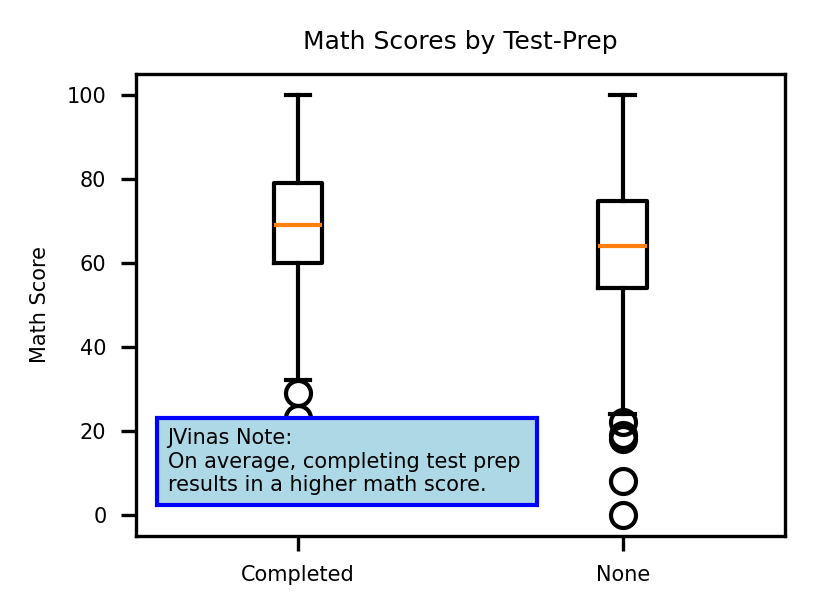

In [49]:
#------------------------------------------------------------------
#B: Visualization #2 — Test prep impact on math (2 pts)
#Ba.	Question: Do students who completed test prep score higher in math?
#Bb.	Chart: Any chart of your choice for math score by test preparation course (completed vs none).

#First, separate the data into completed vs no completion data frames
completed_true = q2df[q2df['test preparation course'] =='completed']
completed_false = q2df[q2df['test preparation course'] =='none']

#Organize data for the math score
math_scores_completed = completed_true['math score']
math_scores_none = completed_false['math score']
mathdata_multiple = [math_scores_completed, math_scores_none]

#Create a figure with one subplots
dpi = 300
width = 800/dpi
height = 600/dpi
fig, ax = plt.subplots(figsize=(width,height), dpi=300)

#Plot the Math box plot on ax
ax.boxplot(mathdata_multiple)
ax.set_title('Math Scores by Test-Prep')
ax.set_ylabel('Math Score')
ax.set_xticklabels(['Completed', 'None'])

JVinasComment = "JVinas Note: \nOn average, completing test prep \nresults in a higher math score."
text = fig.text(0.2, 0.2, JVinasComment, horizontalalignment='left', wrap=True, bbox=dict(boxstyle='square,pad=0.5', fc='lightblue', ec='blue'))

plt.tight_layout()  #Use the tight layout to prevent overlapping titles/labels
plt.rcParams.update({'font.size': 5})
plt.show()


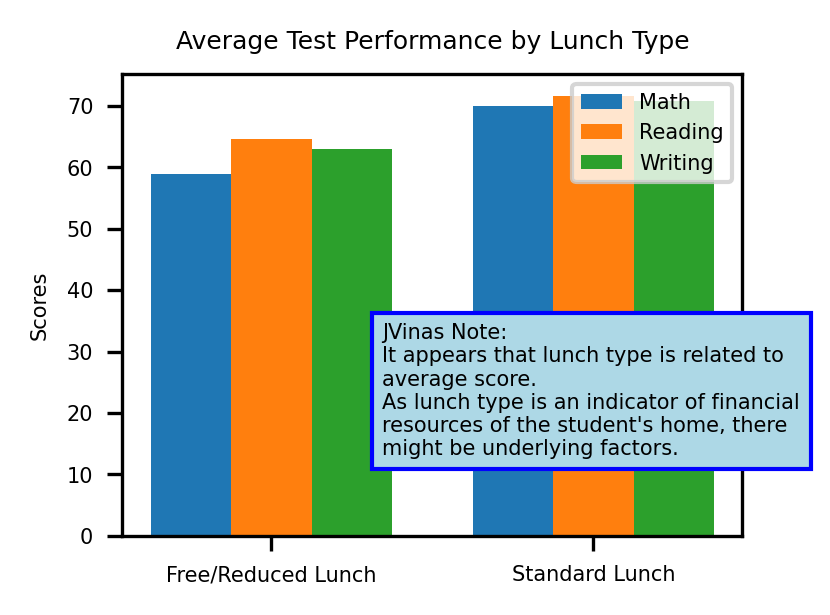

In [50]:
#------------------------------------------------------------------
#C: Visualization #3 - Lunch type and average performance (2 pts)
#Ca.	Question: Does lunch type (standard vs free/reduced) relate to outcomes?
#Cb.	Chart: Grouped bar chart of mean overall_avg of all the scores (math, reading, writing) by lunch.

std_lunch = q2df[q2df['lunch'] =='standard']
free_lunch = q2df[q2df['lunch'] =='free/reduced']

labels = ['Free/Reduced Lunch', 'Standard Lunch']
mathing_means = [free_lunch['math score'].mean(),std_lunch['math score'].mean(),]
reading_means = [free_lunch['reading score'].mean(),std_lunch['reading score'].mean(),]
writing_means = [free_lunch['writing score'].mean(),std_lunch['writing score'].mean()]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

dpi = 300
figwidth = 800/dpi
figheight = 600/dpi
fig, ax = plt.subplots(figsize=(figwidth,figheight), dpi=300)
rects1 = ax.bar(x - width, mathing_means, width, label='Math')
rects2 = ax.bar(x, reading_means, width, label='Reading')
rects3 = ax.bar(x + width, writing_means, width, label='Writing')

JVinasComment = "JVinas Note: \nIt appears that lunch type is related to average score. \nAs lunch type is an indicator of financial resources of the student's home, there might be underlying factors."
text = fig.text(0.45, 0.25, JVinasComment, horizontalalignment='left', wrap=True, bbox=dict(boxstyle='square,pad=0.5', fc='lightblue', ec='blue'))

ax.set_ylabel('Scores')
ax.set_title('Average Test Performance by Lunch Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

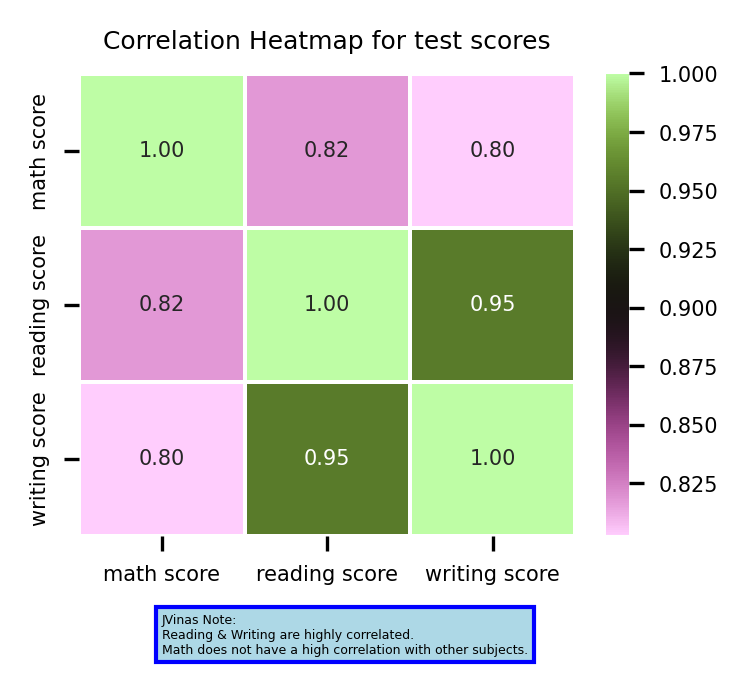

In [51]:
#------------------------------------------------------------------
#D:	Visualization #4 — Subject correlations (2 pts)
#Da.	Question: How strongly do the three subjects move together?
#Db.	Chart: Correlation heatmap for math, reading, writing with annotated coefficients.

dpi = 300
figwidth = 800/dpi
figheight = 600/dpi

data = q2df[['math score','reading score','writing score']]
correlation_matrix = data.corr()
plt.figure(figsize=(figwidth, figheight),dpi=300)
sns.heatmap(correlation_matrix, annot=True, cmap='vanimo', fmt=".2f", linewidths=.5)

JVinasComment = "JVinas Note: \nReading & Writing are highly correlated. \nMath does not have a high correlation with other subjects."
text = plt.text(0.5, 3.75, JVinasComment, horizontalalignment='left', wrap=True, bbox=dict(boxstyle='square,pad=0.5', fc='lightblue', ec='blue'), font={'size':3})

plt.title('Correlation Heatmap for test scores')
plt.show()

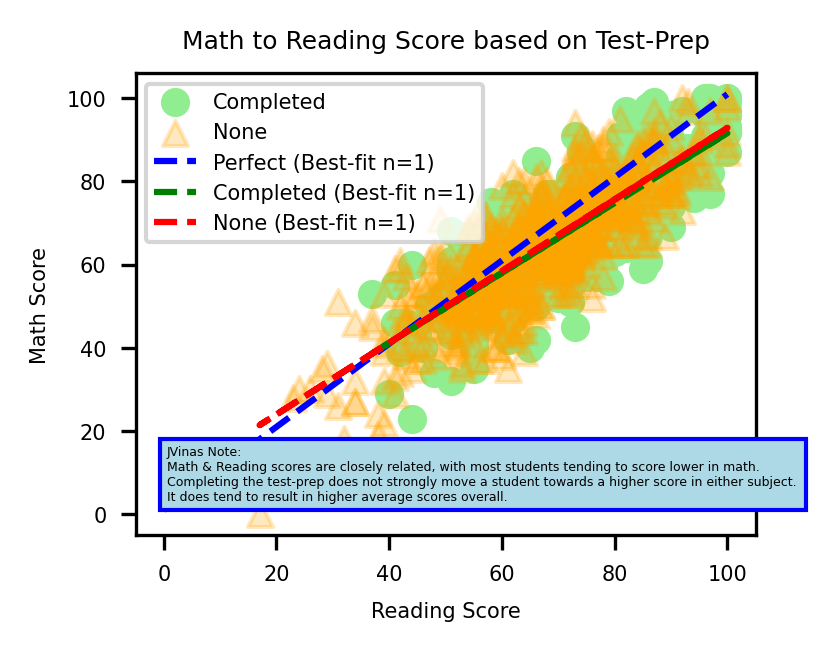

In [52]:
#------------------------------------------------------------------
#E:	Visualization #5 — Math vs reading with trend lines by test prep (2 pts)
#Ea.	Question: How strongly are math and reading scores associated, and do students who completed the test‑preparation course have a different slope in the math–reading relationship than those who did not?
#Eb.	Chart: Scatter plot with two straight best‑fit lines (one for each group: completed, none).
#Ebi.	X‑axis: reading score
#Ebii.	Y‑axis: math score
#Ec.	Color: Points colored by test preparation course (legend must show the two groups and each group’s n).

completed_true = q2df[q2df['test preparation course'] =='completed']
completed_false = q2df[q2df['test preparation course'] =='none']

x1 = completed_true['reading score']
y1 = completed_true['math score']
x2 = completed_false['reading score']
y2 = completed_false['math score']

dpi = 300
figwidth = 800/dpi
figheight = 600/dpi
plt.figure(figsize=(figwidth, figheight),dpi=300)

# Create the scatter plot
plt.scatter(x1, y1, marker='o', label='Completed', color='lightgreen')
plt.scatter(x2, y2, marker='^', label='None', color='orange', alpha=0.25)

#Calculate the line of best fit using numpy.polyfit() using a first-order polynomial for a straight line
slope1, intercept1 = np.polyfit(x1, y1, 1)
slope2, intercept2 = np.polyfit(x2, y2, 1)
slope = 1.0
intercept = 1.0

#Create a line of perfect association
x_line = np.linspace(0,100,100) #Create 100 points from 0 to 100
line_y = slope * x_line + intercept

#Generate points for this best-fit line
line_y1 = slope1 * x1 + intercept1
line_y2 = slope2 * x2 + intercept2

#Plot the Lines
plt.plot(x_line, line_y, color='blue', linestyle='--', label='Perfect (Best-fit n=1)')
plt.plot(x1, line_y1, color='green', linestyle='--', label='Completed (Best-fit n=1)')
plt.plot(x2, line_y2, color='red', linestyle='--', label='None (Best-fit n=1)')

#Ea.	Question: How strongly are math and reading scores associated, and do students who completed the test‑preparation course have a different slope in the math–reading relationship than those who did not?
JVinasComment = "JVinas Note: \nMath & Reading scores are closely related, with most students tending to score lower in math. \nCompleting the test-prep does not strongly move a student towards a higher score in either subject. \nIt does tend to result in higher average scores overall."
text = plt.text(0.5, 3.75, JVinasComment, horizontalalignment='left', wrap=True, bbox=dict(boxstyle='square,pad=0.5', fc='lightblue', ec='blue'), font={'size':3})

# Add title and labels
plt.title("Math to Reading Score based on Test-Prep")
plt.xlabel("Reading Score")
plt.ylabel("Math Score")
plt.legend()

# Display the plot
plt.show()